In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from dython.nominal import associations

C:\Users\filip\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\filip\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\filip\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df_1=df.copy()
df_1=df_1.iloc[:,1:]


In [7]:
df_1.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

C:\Users\filip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

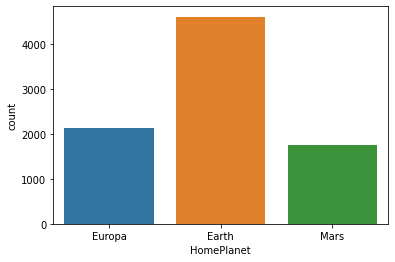

In [8]:
sns.countplot(df_1['HomePlanet'])

C:\Users\filip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

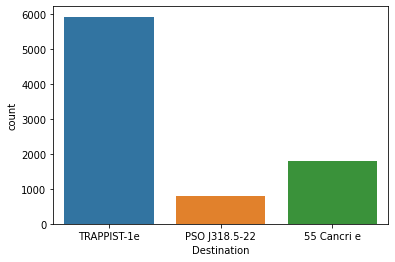

In [9]:
sns.countplot(df_1['Destination'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

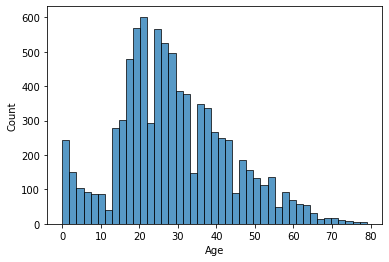

In [10]:
sns.histplot(df_1['Age'])

In [11]:
df_1.groupby('Cabin')['Cabin'].count()

Cabin
A/0/P     2
A/0/S     2
A/1/S     3
A/10/P    1
A/10/S    1
         ..
T/0/P     1
T/1/P     1
T/2/P     1
T/2/S     1
T/3/P     1
Name: Cabin, Length: 6560, dtype: int64

In [13]:
df_2=df_1.copy()
df_2=df_2.iloc[:,[0,1,3,4,5,6,8,9,10,12]]
df_2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,151.0,565.0,2.0,True


In [14]:
df_2['HomePlanet']= df_2['HomePlanet'].fillna('Other')
df_2['Destination']= df_2['Destination'].fillna('Other')

In [22]:
from sklearn.preprocessing import LabelEncoder
encoders = dict()
cols=['CryoSleep','VIP','Transported']
for col_name in cols:
    series = df_2[col_name]
    label_encoder = LabelEncoder()
    df_2[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

In [15]:
df_2.isnull().sum()

HomePlanet        0
CryoSleep       217
Destination       0
Age             179
VIP             203
RoomService     181
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [23]:
df_4 = pd.get_dummies(df_2, prefix='HomePlanet', columns=['HomePlanet'])


In [24]:
df_4.isnull().sum()

CryoSleep            217
Destination            0
Age                  179
VIP                  203
RoomService          181
ShoppingMall         208
Spa                  183
VRDeck               188
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
HomePlanet_Other       0
dtype: int64

In [25]:
df_4.head()

,CryoSleep,Destination,Age,VIP,RoomService,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Other
0,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
1,0.0,TRAPPIST-1e,24.0,0.0,109.0,25.0,549.0,44.0,1,1,0,0,0
2,0.0,TRAPPIST-1e,58.0,1.0,43.0,0.0,6715.0,49.0,0,0,1,0,0
3,0.0,TRAPPIST-1e,33.0,0.0,0.0,371.0,3329.0,193.0,0,0,1,0,0
4,0.0,TRAPPIST-1e,16.0,0.0,303.0,151.0,565.0,2.0,1,1,0,0,0


In [26]:

df_4 = pd.get_dummies(df_4, prefix='Destination', columns=['Destination'])


In [28]:
df_4.to_excel('C://Users//filip//Desktop//exercicios/df.xlsx')